Wifi Networks
===================================================


In [6]:
# Import and Init the main tools

from lib.cached_data_loader import CachedDataLoader
from lib.panda_plotter import PandaPlotter
cdl = CachedDataLoader()
pp = PandaPlotter()


In [7]:
# Get hold of the dataframe 
sql = 'SELECT DATE_FORMAT(MIN(ts), "%Y-%m-%d %H:00:00") AS ts, ' \
      'ROUND(COUNT(*) / COUNT(DISTINCT mqtt_batch)) AS CNT_PER_MIN, COUNT(DISTINCT mqtt_batch) AS BN,' \
      'ROUND(SUM(IF(ssid = "5te", 1, 0)) / COUNT(DISTINCT mqtt_batch))       AS CNT_5TE, ' \
      'ROUND(SUM(IF(ssid = "eduroam", 1, 0)) / COUNT(DISTINCT mqtt_batch))   AS CNT_EDUROAM, ' \
      'ROUND(SUM(IF(ssid = "ITU++", 1, 0)) / COUNT(DISTINCT mqtt_batch))     AS CNT_ITU_PLUS, ' \
      'ROUND(SUM(IF(ssid = "ITU-guest", 1, 0)) / COUNT(DISTINCT mqtt_batch)) AS CNT_ITU_GUEST, ' \
      'ROUND(SUM(IF(ssid = "sensors", 1, 0)) / COUNT(DISTINCT mqtt_batch))   AS CNT_SENSORS ' \
      'FROM wifi_clients ' \
      'GROUP BY YEAR(ts), MONTH(ts), DAY(ts), HOUR(ts)'

df = cdl.get_dataframe(sql)
df = cdl.reindex_by_timestamp(df, "ts", "1H")

mask = (df['ts'] >= '2019-11-01 00:00:00') & (df['ts'] <= '2019-12-01 00:00:00')
mdf = df.loc[mask]


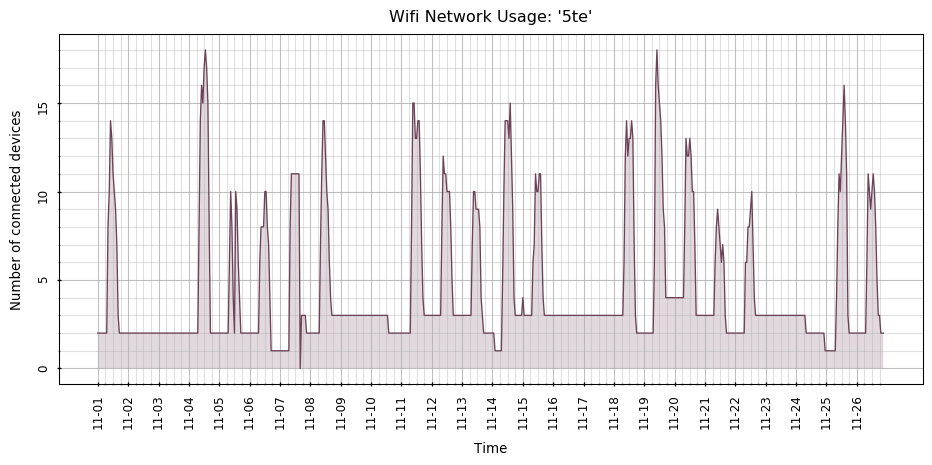

In [8]:
plotconfig = {
    "title": "Wifi Network Usage: '5te'",
    "plots": [
        {
            "data": mdf,
            "title": "",
            "x_column": "ts",
            "y_column": ["CNT_5TE"],
            "x_label": "Time",
            "y_label": "Number of connected devices",
            "x_major_ticks_freq": 24,
            "x_minor_ticks_freq": 6,
            "y_major_ticks_freq": 5,
            "y_minor_ticks_freq": 1,
        }
    ],
    "style": {
        "palette_color": "pink",
        "x_axis_value_rotation": 90,
        "y_axis_value_rotation": 90,
        "x_axis_value_format": "%m-%d",
        "y_axis_value_format": "",
    }
}
pp.plot(plotconfig)



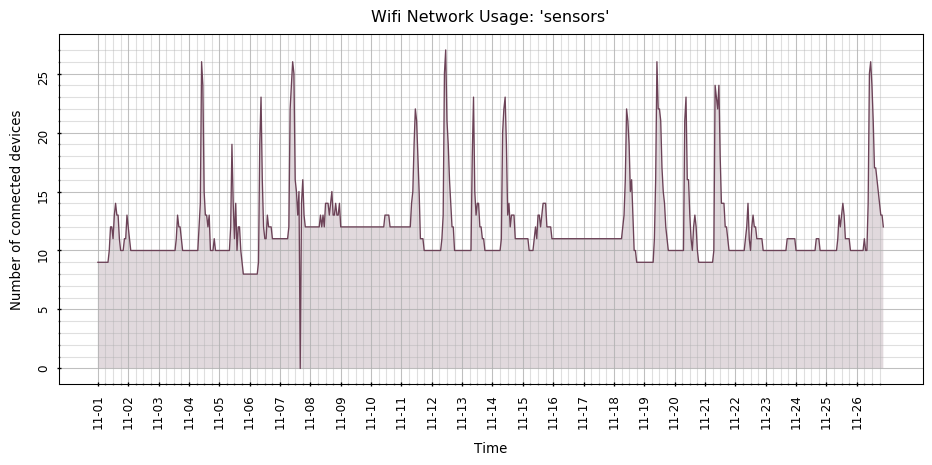

In [9]:
plotconfig = {
    "title": "Wifi Network Usage: 'sensors'",
    "plots": [
        {
            "data": mdf,
            "title": "",
            "x_column": "ts",
            "y_column": ["CNT_SENSORS"],
            "x_label": "Time",
            "y_label": "Number of connected devices",
            "x_major_ticks_freq": 24,
            "x_minor_ticks_freq": 6,
            "y_major_ticks_freq": 5,
            "y_minor_ticks_freq": 1,
        }
    ],
    "style": {
        "palette_color": "pink",
        "x_axis_value_rotation": 90,
        "y_axis_value_rotation": 90,
        "x_axis_value_format": "%m-%d",
        "y_axis_value_format": "",
    }
}
pp.plot(plotconfig)



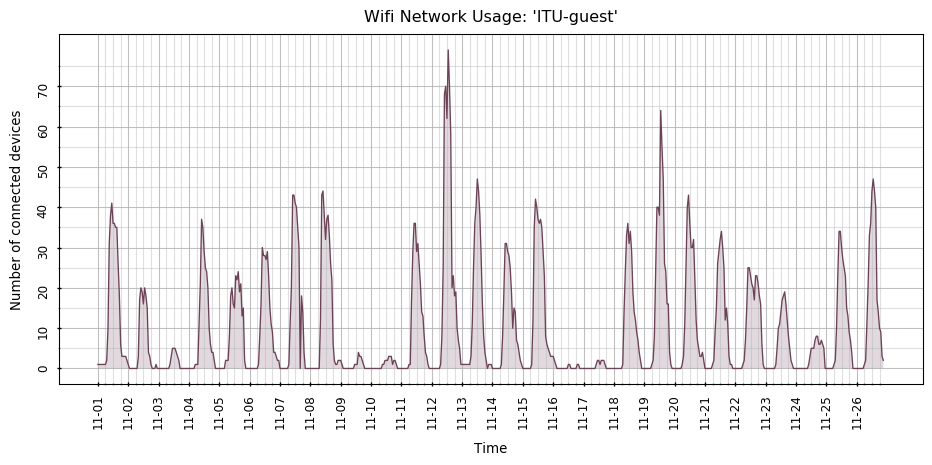

In [10]:
plotconfig = {
    "title": "Wifi Network Usage: 'ITU-guest'",
    "plots": [
        {
            "data": mdf,
            "title": "",
            "x_column": "ts",
            "y_column": ["CNT_ITU_GUEST"],
            "x_label": "Time",
            "y_label": "Number of connected devices",
            "x_major_ticks_freq": 24,
            "x_minor_ticks_freq": 6,
            "y_major_ticks_freq": 10,
            "y_minor_ticks_freq": 5,
        }
    ],
    "style": {
        "palette_color": "pink",
        "x_axis_value_rotation": 90,
        "y_axis_value_rotation": 90,
        "x_axis_value_format": "%m-%d",
        "y_axis_value_format": "",
    }
}
pp.plot(plotconfig)


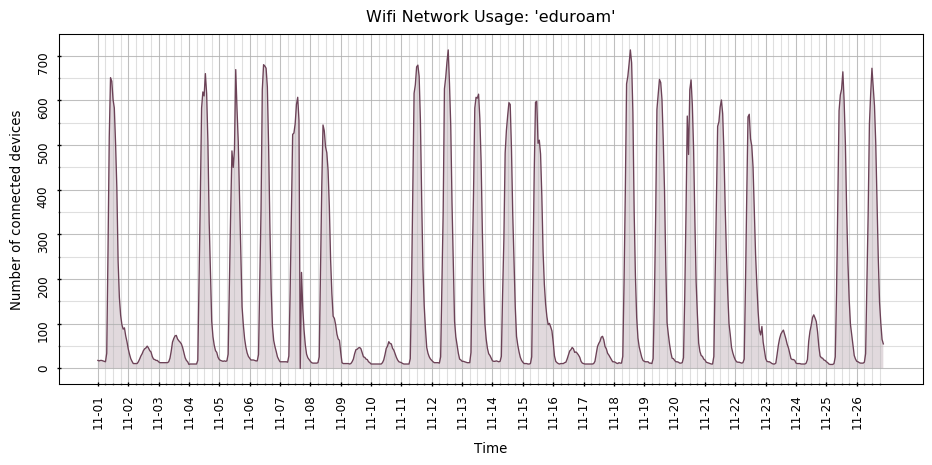

In [11]:
plotconfig = {
    "title": "Wifi Network Usage: 'eduroam'",
    "plots": [
        {
            "data": mdf,
            "title": "",
            "x_column": "ts",
            "y_column": ["CNT_EDUROAM"],
            "x_label": "Time",
            "y_label": "Number of connected devices",
            "x_major_ticks_freq": 24,
            "x_minor_ticks_freq": 6,
            "y_major_ticks_freq": 100,
            "y_minor_ticks_freq": 50,
        }
    ],
    "style": {
        "palette_color": "pink",
        "x_axis_value_rotation": 90,
        "y_axis_value_rotation": 90,
        "x_axis_value_format": "%m-%d",
        "y_axis_value_format": "",
    }
}
pp.plot(plotconfig)


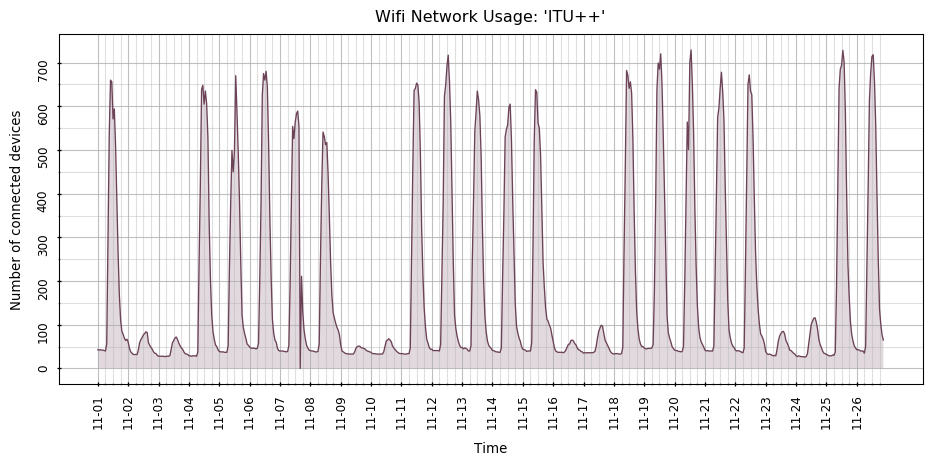

In [12]:
plotconfig = {
    "title": "Wifi Network Usage: 'ITU++'",
    "plots": [
        {
            "data": mdf,
            "title": "",
            "x_column": "ts",
            "y_column": ["CNT_ITU_PLUS"],
            "x_label": "Time",
            "y_label": "Number of connected devices",
            "x_major_ticks_freq": 24,
            "x_minor_ticks_freq": 6,
            "y_major_ticks_freq": 100,
            "y_minor_ticks_freq": 50,
        }
    ],
    "style": {
        "palette_color": "pink",
        "x_axis_value_rotation": 90,
        "y_axis_value_rotation": 90,
        "x_axis_value_format": "%m-%d",
        "y_axis_value_format": "",
    }
}
pp.plot(plotconfig)



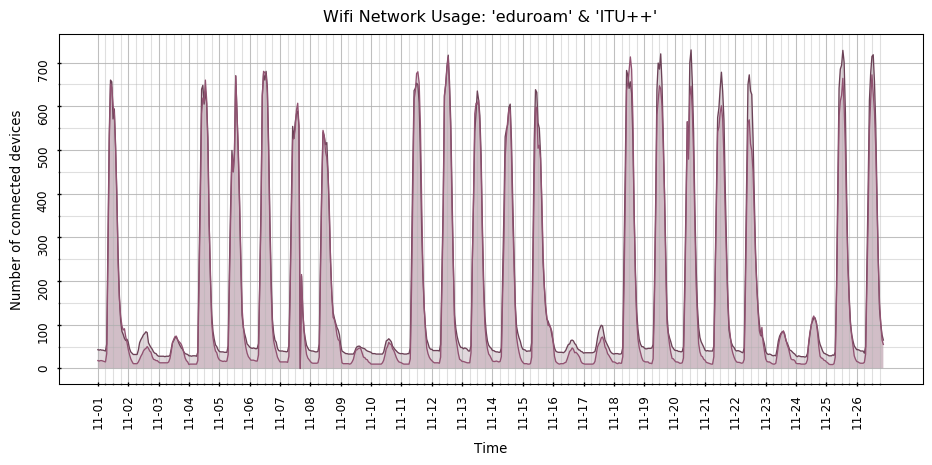

In [13]:
plotconfig = {
    "title": "Wifi Network Usage: 'eduroam' & 'ITU++'",
    "plots": [
        {
            "data": mdf,
            "title": "",
            "x_column": "ts",
            "y_column": ["CNT_ITU_PLUS", "CNT_EDUROAM"],
            "x_label": "Time",
            "y_label": "Number of connected devices",
            "x_major_ticks_freq": 24,
            "x_minor_ticks_freq": 6,
            "y_major_ticks_freq": 100,
            "y_minor_ticks_freq": 50,
        }
    ],
    "style": {
        "palette_color": "pink",
        "x_axis_value_rotation": 90,
        "y_axis_value_rotation": 90,
        "x_axis_value_format": "%m-%d",
        "y_axis_value_format": "",
    }
}
pp.plot(plotconfig)